## Lecture 1: Introduction to Feature Engineering
==========================================

Key Learning Objectives:
1. Understand what feature engineering is and why it matters
2. Learn to identify opportunities for feature engineering
3. See the impact of feature engineering on model performance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from scipy import stats

# Set plotting style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

In [ ]:
# Load the dataset
df = pd.read_csv('loan_applications.csv')


# Display basic dataset information
print("Dataset Overview:")
print(f"Number of samples: {len(df)}")
print(f"Original features: {df.columns.tolist()}")
print("\nSample data:")
print(df.head())

Dataset Overview:
Number of samples: 50000
Original features: ['application_id', 'application_date', 'age', 'gender', 'education', 'occupation', 'employment_length', 'income', 'loan_amount', 'loan_term', 'interest_rate', 'monthly_payment', 'credit_score', 'existing_loans', 'previous_defaults', 'city', 'default']

Sample data:
   application_id application_date  age gender    education     occupation  \
0               1       2020-01-05   40      M       Master  Self-employed   
1               2       2020-05-21   33      M     Bachelor       Salaried   
2               3       2020-09-24   42      F     Bachelor     Unemployed   
3               4       2020-05-10   53      F  High School       Salaried   
4               5       2020-05-15   32      M       Master       Salaried   

   employment_length    income  loan_amount  loan_term  interest_rate  \
0          13.573526  40298.38     95254.57         48          10.95   
1           3.061310  38167.11    140514.31         60   

###  Creating Simple Features
-------------------------
Let's create our first engineered feature: Debt-to-Income Ratio

In [ ]:
# Create debt-to-income ratio feature
df['debt_to_income'] = df['monthly_payment'] * 12 / df['income']

# Handle any potential infinite or NaN values
df['debt_to_income'] = df['debt_to_income'].replace([np.inf, -np.inf], np.nan)
df['debt_to_income'] = df['debt_to_income'].fillna(df['debt_to_income'].mean())

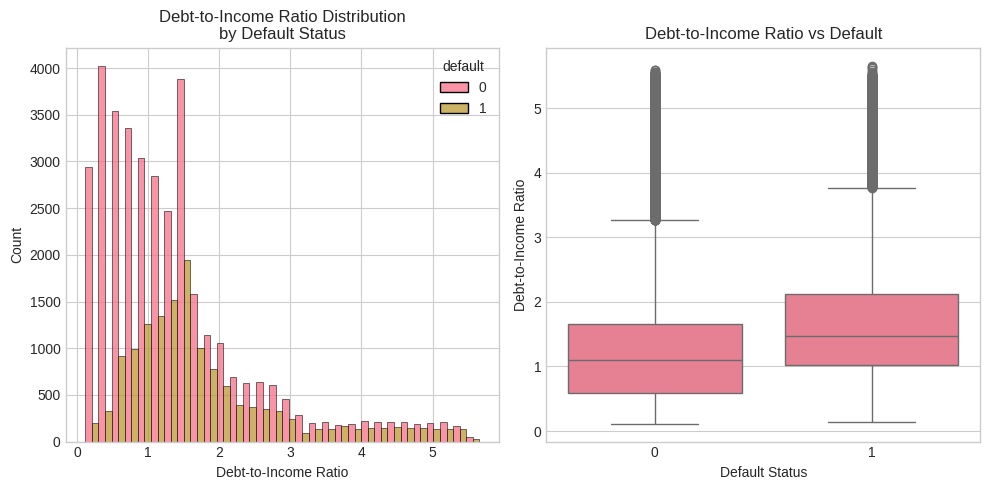

In [ ]:
# Visualize the new feature
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='debt_to_income', hue='default', multiple="dodge", bins=30)
plt.title('Debt-to-Income Ratio Distribution\nby Default Status')
plt.xlabel('Debt-to-Income Ratio')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='default', y='debt_to_income')
plt.title('Debt-to-Income Ratio vs Default')
plt.xlabel('Default Status')
plt.ylabel('Debt-to-Income Ratio')

plt.tight_layout()
plt.show()

In [ ]:
def evaluate_features(X, y, feature_set_name=""):
    # Handle missing values
    X = X.fillna(X.mean())

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)

    print(f"\nModel Performance with {feature_set_name}:")
    print(f"ROC-AUC Score: {auc_score:.4f}")

    return auc_score

### PART 3: Evaluating Feature Impact
--------------------------
Compare model performance with and without engineered features.

In [ ]:
# Original features
original_features = ['loan_amount', 'income']
original_score = evaluate_features(
    df[original_features],
    df['default'],
    "Original Features"
)


Model Performance with Original Features:
ROC-AUC Score: 0.6611


In [ ]:
# Original + engineered features
engineered_features = original_features + ['debt_to_income']
engineered_score = evaluate_features(
    df[engineered_features],
    df['default'],
    "Original + Engineered Features"
)


Model Performance with Original + Engineered Features:
ROC-AUC Score: 0.6626


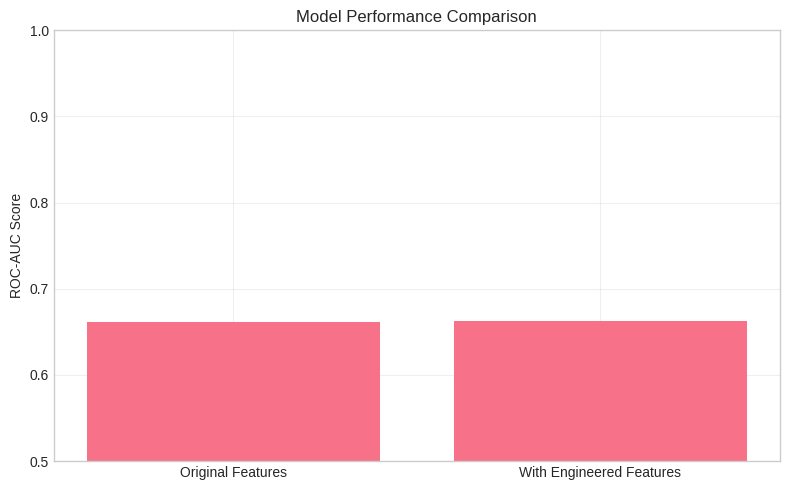

In [ ]:
# Visualize performance comparison
plt.figure(figsize=(8, 5))
plt.bar(['Original Features', 'With Engineered Features'],
        [original_score, engineered_score])
plt.title('Model Performance Comparison')
plt.ylabel('ROC-AUC Score')
plt.ylim(0.5, 1.0)  # AUC score range from 0.5 to 1.0
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Key Takeaways:
------------
1. Feature Engineering Basics:
   - Creating meaningful combinations of existing features
   - Using domain knowledge to guide feature creation
   - Handling edge cases and missing values

2. Impact on Model Performance:
   - Engineered features can capture non-linear relationships
   - Simple ratios often provide valuable insights
   - Always validate feature impact with metrics



## Lecture 2: Understanding the Dataset
==================================

Key Learning Objectives:
1. Learn how to analyze features for engineering opportunities
2. Understand relationships between features
3. Identify patterns that suggest useful feature transformations

In [ ]:
# Load the dataset
df = pd.read_csv('loan_applications.csv')

In [ ]:
df.head()

,application_id,application_date,age,gender,education,occupation,employment_length,income,loan_amount,loan_term,interest_rate,monthly_payment,credit_score,existing_loans,previous_defaults,city,default
0,1,2020-01-05,40,M,Master,Self-employed,13.573526,40298.38,95254.57,48,10.95,2459.46,781.0,0.0,0,CITY_22,0
1,2,2020-05-21,33,M,Bachelor,Salaried,3.061310,38167.11,140514.31,60,17.12,3501.53,687.0,1.0,0,CITY_41,0
2,3,2020-09-24,42,F,Bachelor,Unemployed,12.040059,8666.27,13340.61,60,11.89,296.01,795.0,0.0,0,CITY_68,0
3,4,2020-05-10,53,F,High School,Salaried,8.490862,33093.00,73008.42,60,12.89,1657.01,724.0,2.0,0,CITY_8,0
4,5,2020-05-15,32,M,Master,Salaried,0.782913,41115.42,51399.26,12,7.58,4461.24,510.0,0.0,0,CITY_33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     50000 non-null  int64  
 1   application_date   50000 non-null  object 
 2   age                50000 non-null  int64  
 3   gender             50000 non-null  object 
 4   education          50000 non-null  object 
 5   occupation         50000 non-null  object 
 6   employment_length  42840 non-null  float64
 7   income             47555 non-null  float64
 8   loan_amount        50000 non-null  float64
 9   loan_term          50000 non-null  int64  
 10  interest_rate      50000 non-null  float64
 11  monthly_payment    50000 non-null  float64
 12  credit_score       47422 non-null  float64
 13  existing_loans     47487 non-null  float64
 14  previous_defaults  50000 non-null  int64  
 15  city               50000 non-null  object 
 16  default            500

In [ ]:
df.head()

,application_id,application_date,age,gender,education,occupation,employment_length,income,loan_amount,loan_term,interest_rate,monthly_payment,credit_score,existing_loans,previous_defaults,city,default
0,1,2020-01-05,40,M,Master,Self-employed,13.573526,40298.38,95254.57,48,10.95,2459.46,781.0,0.0,0,CITY_22,0
1,2,2020-05-21,33,M,Bachelor,Salaried,3.061310,38167.11,140514.31,60,17.12,3501.53,687.0,1.0,0,CITY_41,0
2,3,2020-09-24,42,F,Bachelor,Unemployed,12.040059,8666.27,13340.61,60,11.89,296.01,795.0,0.0,0,CITY_68,0
3,4,2020-05-10,53,F,High School,Salaried,8.490862,33093.00,73008.42,60,12.89,1657.01,724.0,2.0,0,CITY_8,0
4,5,2020-05-15,32,M,Master,Salaried,0.782913,41115.42,51399.26,12,7.58,4461.24,510.0,0.0,0,CITY_33,1


In [ ]:
# Categorize features
numerical_features = ['age', 'income', 'loan_amount', 'loan_term', 'interest_rate',
                     'monthly_payment', 'credit_score', 'employment_length']
categorical_features = ['gender', 'education', 'occupation', 'city']
temporal_features = ['application_date']
target = 'default'

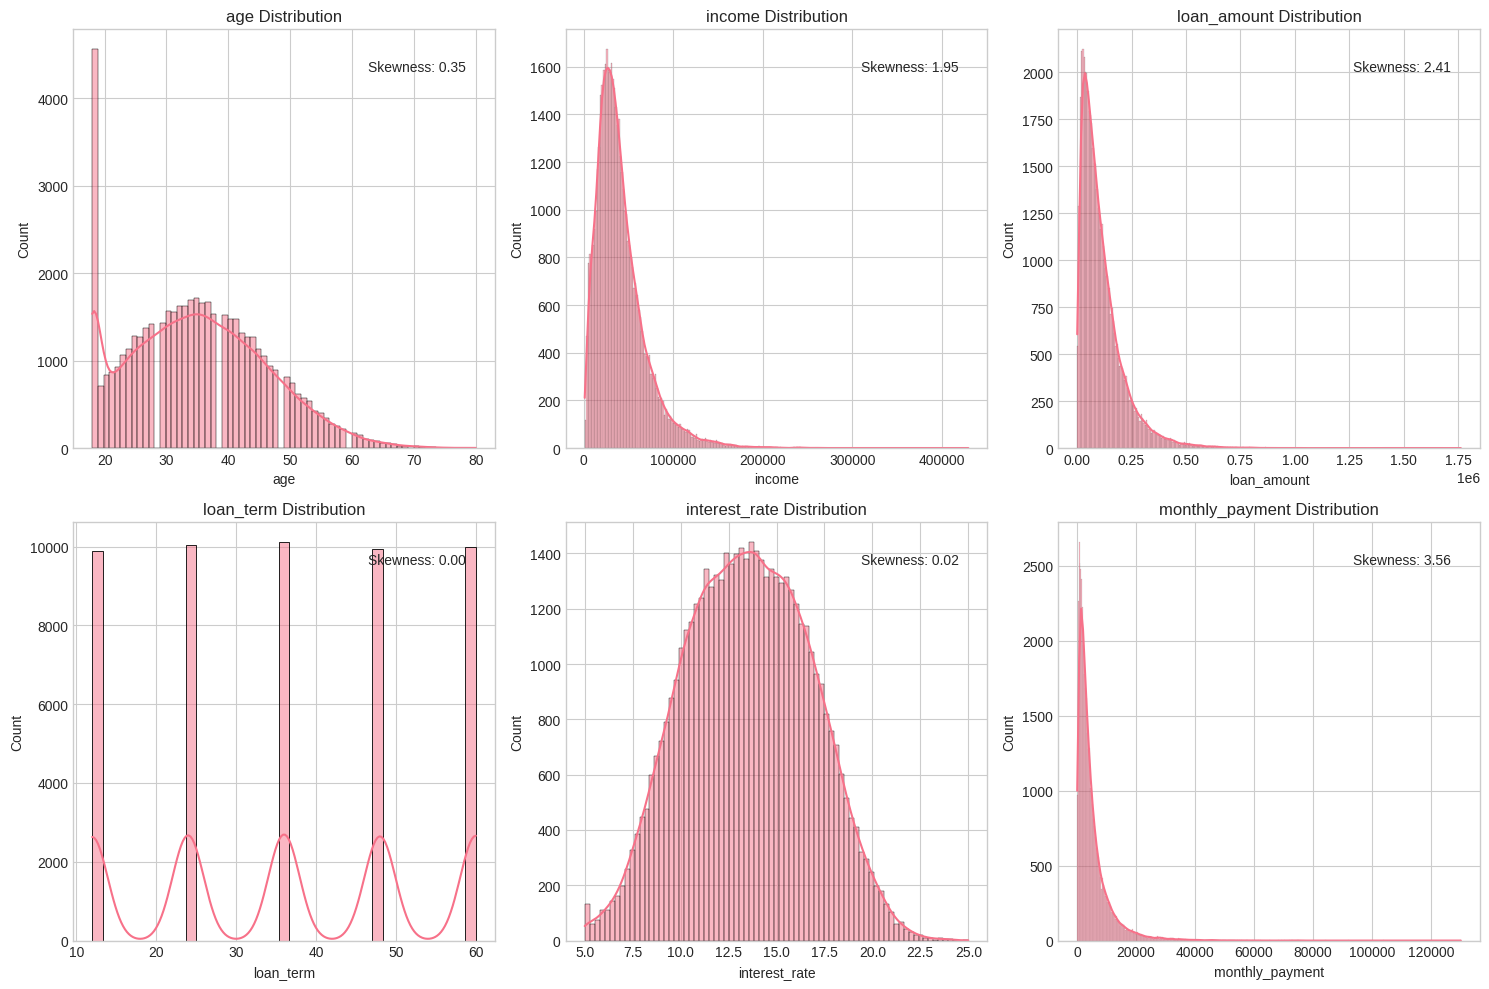

In [ ]:
# Analyze distributions of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    # Add skewness information
    skewness = stats.skew(df[feature].dropna())
    plt.text(0.7, 0.9, f'Skewness: {skewness:.2f}',
             transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

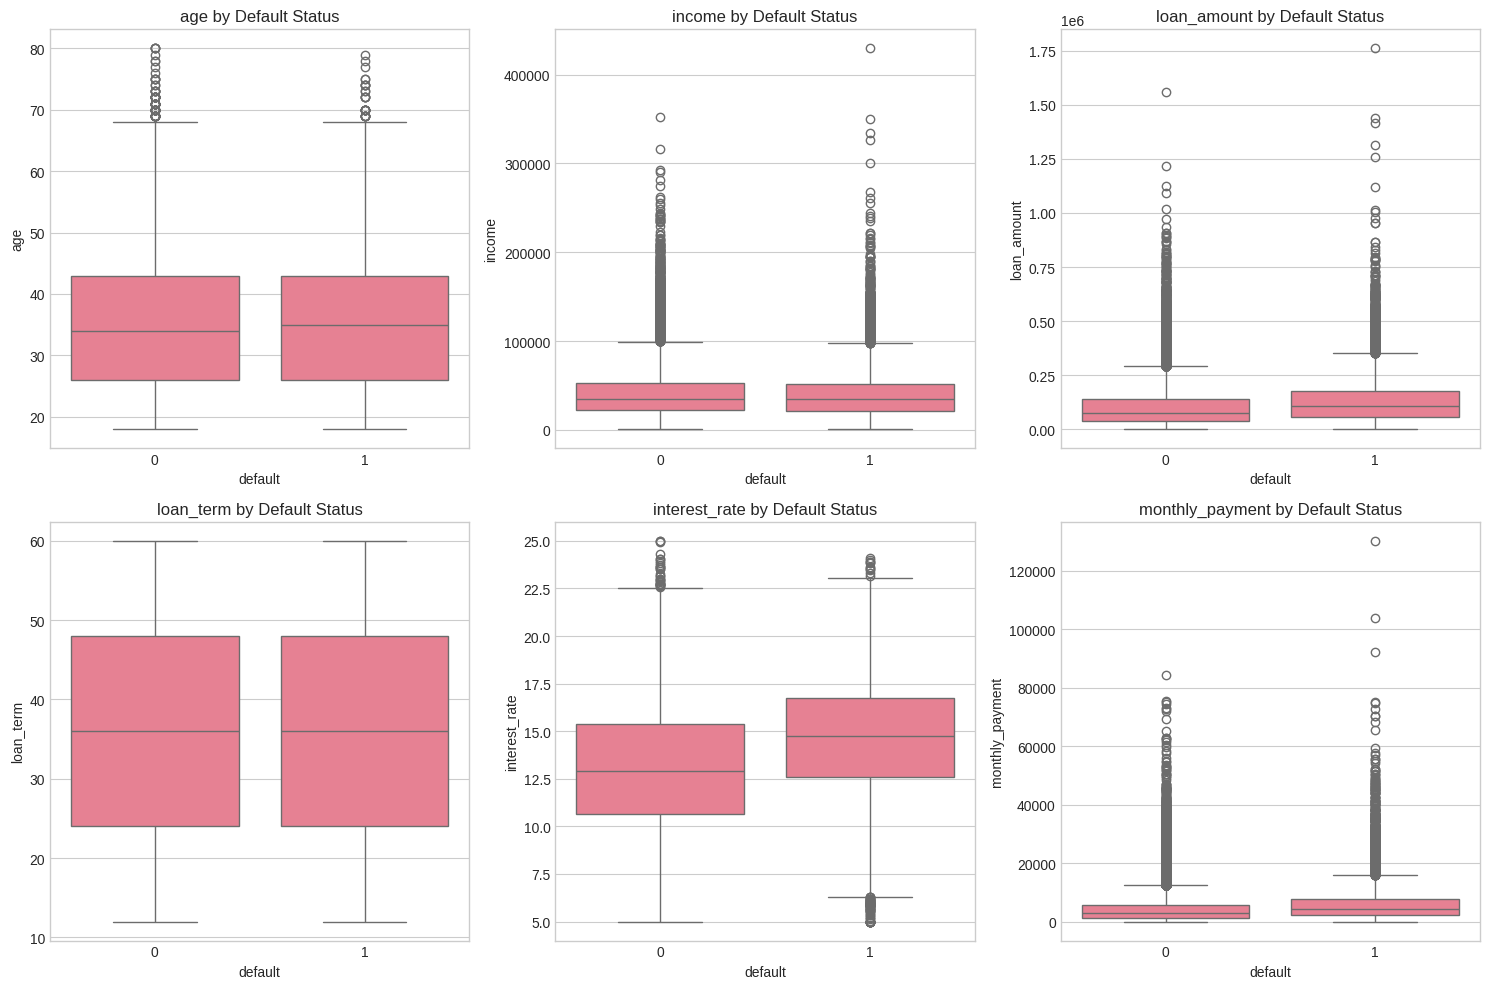

In [ ]:
# Create box plots for numerical features by default status
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='default', y=feature, data=df)
    plt.title(f'{feature} by Default Status')
plt.tight_layout()
plt.show()



gender value counts:
gender
M    29989
F    20011
Name: count, dtype: int64


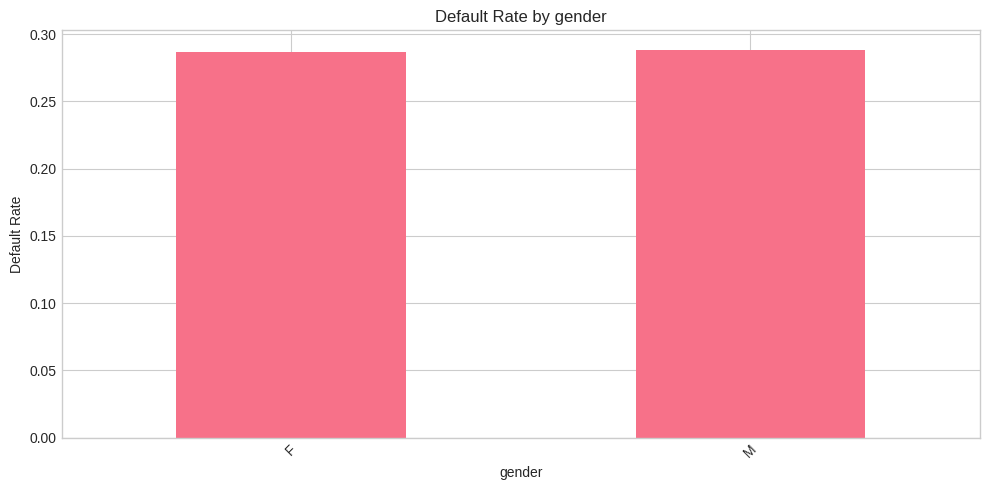


education value counts:
education
High School    19951
Bachelor       14866
Master         10146
Other           2548
PhD             2489
Name: count, dtype: int64


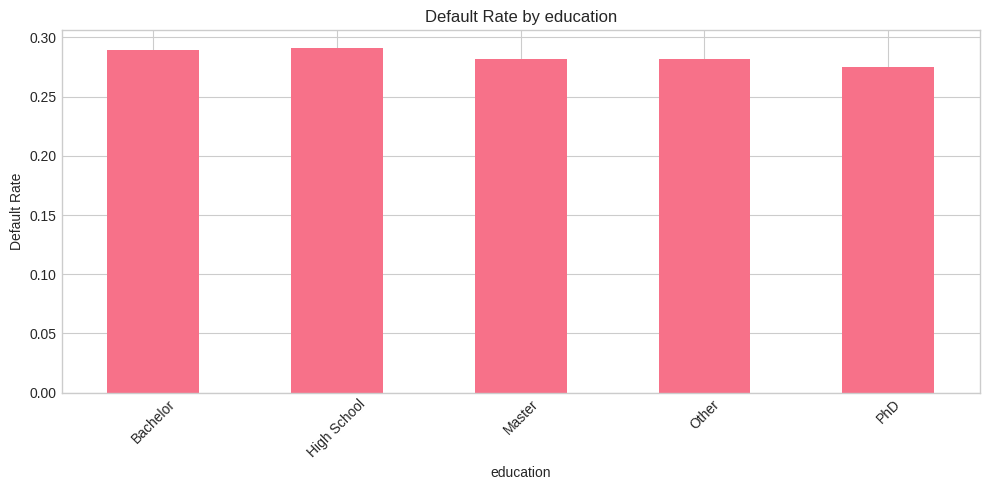


occupation value counts:
occupation
Salaried         24978
Self-employed    10049
Business          7461
Student           2515
Unemployed        2512
Retired           2485
Name: count, dtype: int64


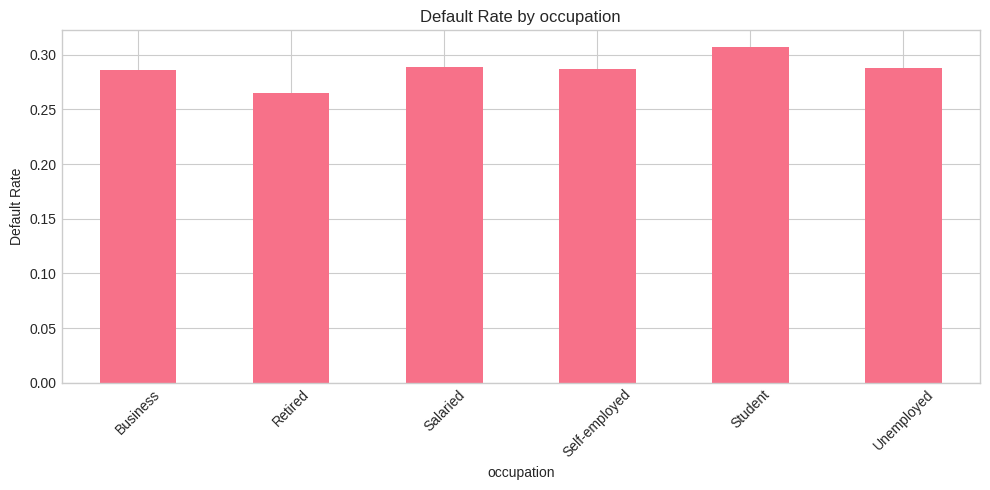


city value counts:
city
CITY_50    2217
CITY_90    1990
CITY_68    1766
CITY_12    1592
CITY_44    1522
           ... 
CITY_77      25
CITY_13      24
CITY_82       9
CITY_73       8
CITY_0        4
Name: count, Length: 100, dtype: int64


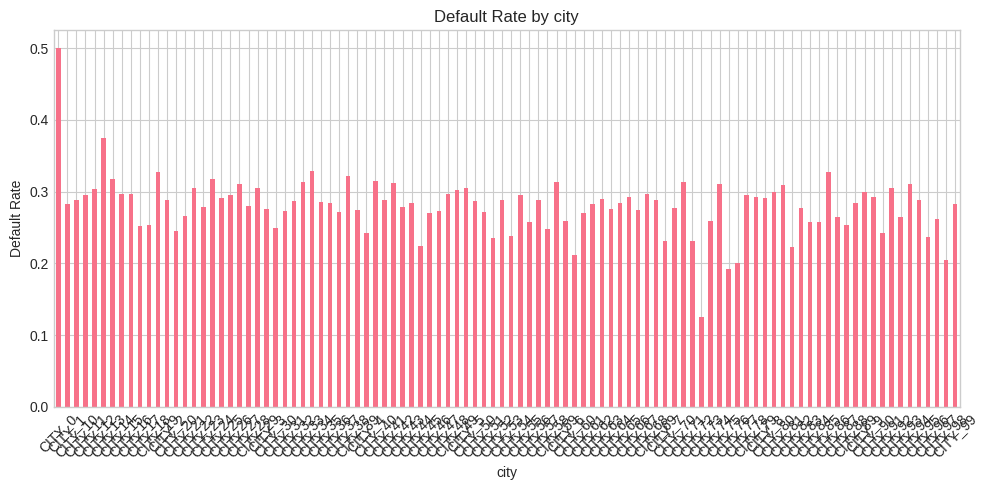

In [ ]:
# Analyze categorical features
for feature in categorical_features:
    print(f"\n{feature} value counts:")
    print(df[feature].value_counts())

    # Calculate default rate by category
    default_rates = df.groupby(feature)['default'].mean()

    plt.figure(figsize=(10, 5))
    default_rates.plot(kind='bar')
    plt.title(f'Default Rate by {feature}')
    plt.ylabel('Default Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

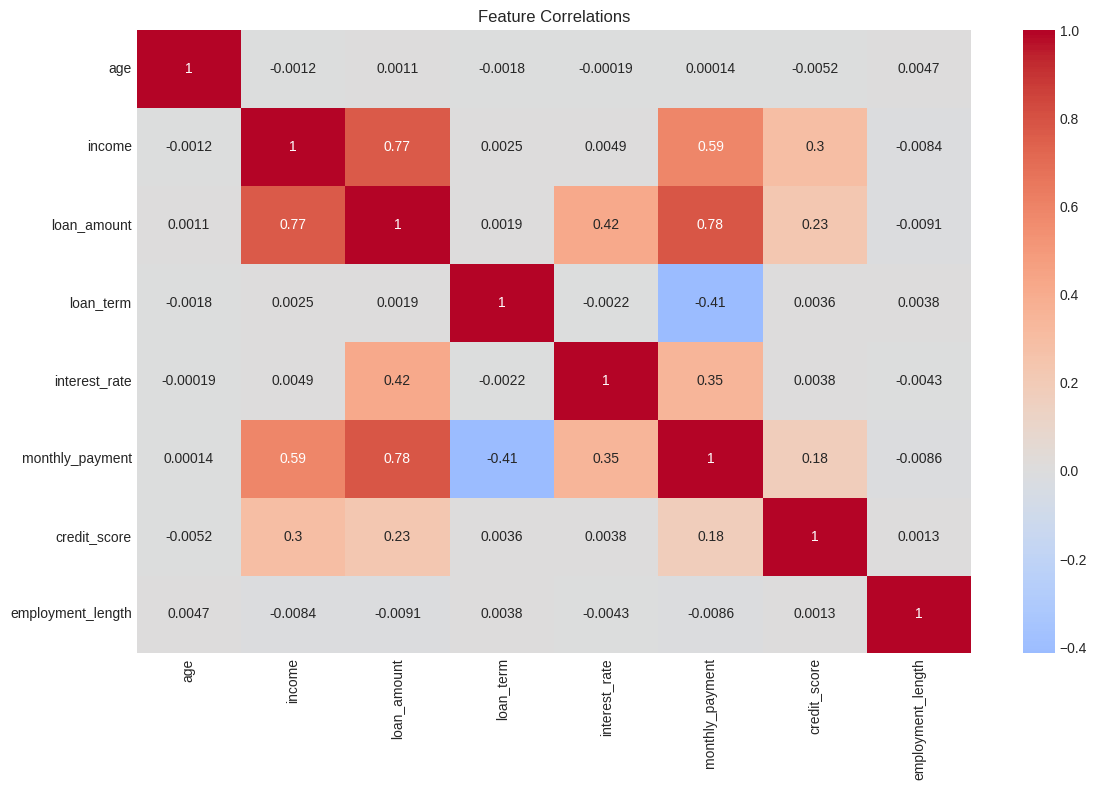

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
# Create correlation matrix for numerical features
correlation_matrix = df[numerical_features + ['default']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

# Examine potential interactions
plt.figure(figsize=(15, 5))

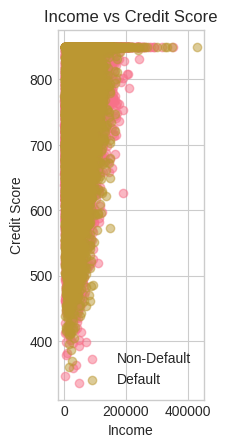

In [ ]:
# Income vs Credit Score by Default
plt.subplot(1, 3, 1)
plt.scatter(df[df['default']==0]['income'],
           df[df['default']==0]['credit_score'],
           alpha=0.5, label='Non-Default')
plt.scatter(df[df['default']==1]['income'],
           df[df['default']==1]['credit_score'],
           alpha=0.5, label='Default')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.title('Income vs Credit Score')
plt.legend()

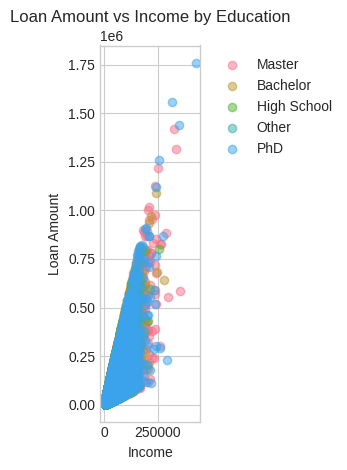

In [ ]:
# Loan Amount vs Income by Education
plt.subplot(1, 3, 2)
for education in df['education'].unique():
    mask = df['education'] == education
    plt.scatter(df[mask]['income'],
               df[mask]['loan_amount'],
               alpha=0.5, label=education)
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income by Education')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Convert application_date to datetime
df['application_date'] = pd.to_datetime(df['application_date'])

# Analyze temporal patterns
df['month'] = df['application_date'].dt.month
df['year'] = df['application_date'].dt.year


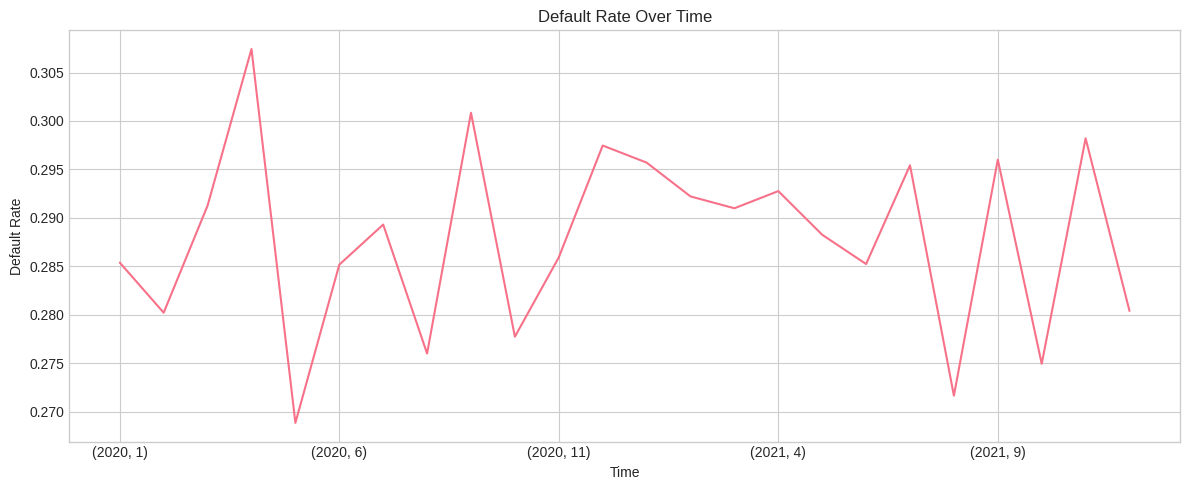

In [ ]:
# Plot default rate over time
monthly_default_rate = df.groupby(['year', 'month'])['default'].mean()

plt.figure(figsize=(12, 5))
monthly_default_rate.plot()
plt.title('Default Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

Feature Engineering Opportunities Identified:
----------------------------------------
1. Numerical Features:
   - Income and loan_amount show right skewness → Log transformation
   - Credit score has outliers → Binning or normalization
   - Employment length has missing values → Imputation needed

2. Categorical Features:
   - Education shows clear relationship with default → Ordinal encoding
   - City has high cardinality → Need dimensionality reduction
   - Occupation has meaningful groups → Potential for grouping

3. Temporal Features:
   - Monthly patterns in default rate → Create cyclical features
   - Application recency might matter → Create time-based features

4. Potential Interactions:
   - Income and education → Create income-education interaction
   - Loan amount and income → Create loan-to-income ratio
   - Credit score and income → Create risk segments

## Lecture 3: Data Cleaning and Missing Value Handling
====================================================


Key Learning Objectives:
1. Learn how to handle missing values appropriately
2. Understand different imputation strategies
3. Implement data cleaning techniques
4. Validate cleaning results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
df = pd.read_csv('loan_applications.csv')

In [ ]:
# Analyze missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

In [ ]:
print("Missing Values Analysis:")
print("-----------------------")
for column, percentage in missing_percentages[missing_percentages > 0].items():
    print(f"{column}: {percentage:.2f}%")

Missing Values Analysis:
-----------------------
employment_length: 14.32%
income: 4.89%
credit_score: 5.16%
existing_loans: 5.03%


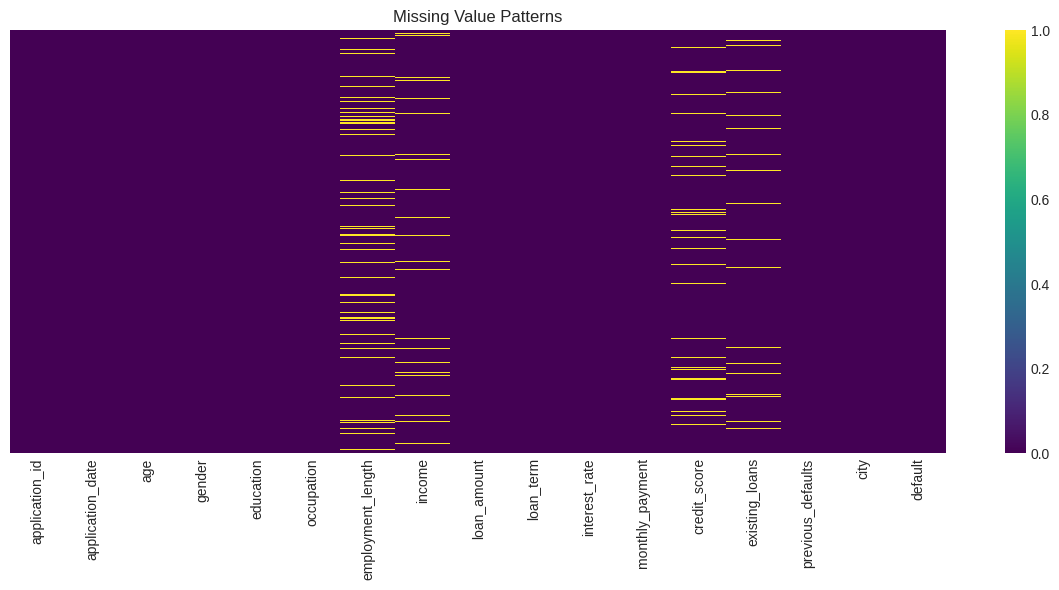

In [ ]:
# Visualize missing value patterns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Value Patterns')
plt.tight_layout()
plt.show()

In [ ]:
# Create a copy of the dataframe for cleaning
df_cleaned = df.copy()

In [ ]:
# 1. Handle employment_length missing values
# Strategy: Use median for different education levels
print("\nMedian employment length by education level:")
print(df.groupby('education')['employment_length'].median())


Median employment length by education level:
education
Bachelor       7.970018
High School    7.952542
Master         8.036012
Other          8.181292
PhD            7.941047
Name: employment_length, dtype: float64


In [ ]:
for education in df['education'].unique():
    mask = df_cleaned['education'] == education
    median_emp_length = df[mask]['employment_length'].median()
    df_cleaned.loc[mask & df_cleaned['employment_length'].isnull(),
                  'employment_length'] = median_emp_length

In [ ]:
# 2. Handle income missing values
# Strategy: Use a more sophisticated imputation based on education and occupation

# REMOVE missing values - rows
print("\nMedian income by education and occupation:")
print(df.groupby(['education', 'occupation'])['income'].median().head())

for (edu, occ) in df.groupby(['education', 'occupation']).groups:
    mask = (df_cleaned['education'] == edu) & (df_cleaned['occupation'] == occ)
    median_income = df[mask]['income'].median()
    df_cleaned.loc[mask & df_cleaned['income'].isnull(), 'income'] = median_income


Median income by education and occupation:
education  occupation   
Bachelor   Business         50463.64
           Retired          25748.04
           Salaried         36141.72
           Self-employed    42693.90
           Student          11121.33
Name: income, dtype: float64


In [ ]:
# 3. Handle credit_score missing values
# Strategy: Use a simple imputer with median strategy
credit_imputer = SimpleImputer(strategy='median')
df_cleaned['credit_score'] = credit_imputer.fit_transform(
    df_cleaned[['credit_score']])

In [ ]:
# 4. Handle existing_loans missing values
# Strategy: Fill with 0 (assume no existing loans if not specified)
df_cleaned['existing_loans'] = df_cleaned['existing_loans'].fillna(0)

In [ ]:
# Check remaining missing values
remaining_missing = df_cleaned.isnull().sum()
print("\nRemaining missing values after imputation:")
print(remaining_missing[remaining_missing > 0])


Remaining missing values after imputation:
Series([], dtype: int64)


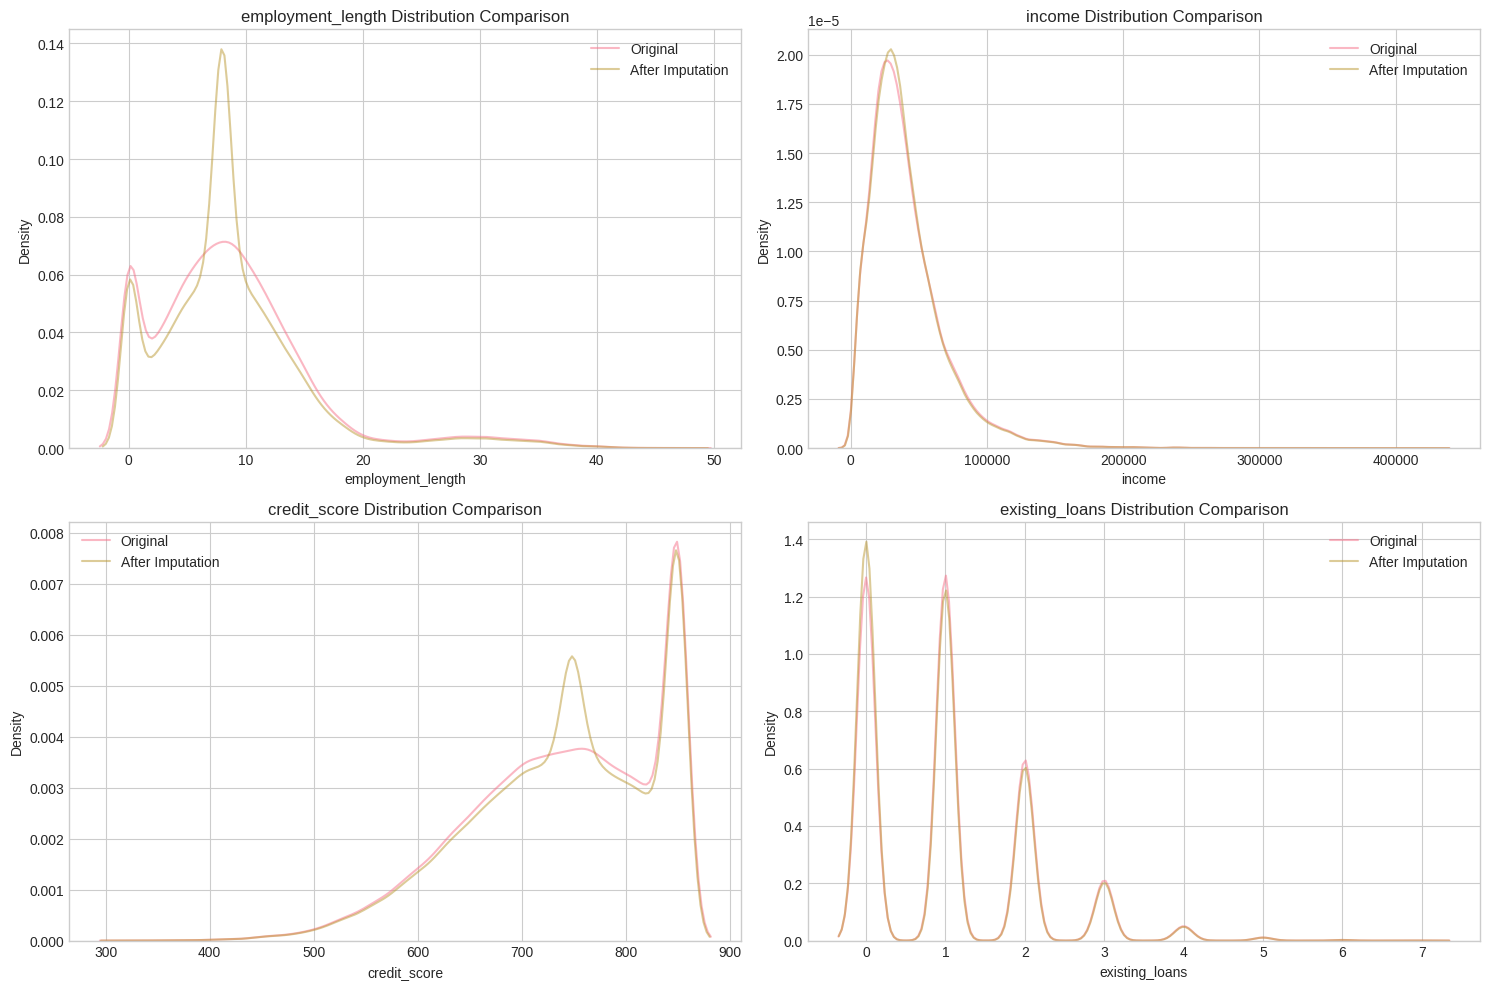

In [ ]:
# Validate imputation results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


# Compare original vs imputed distributions for key features
features_to_validate = ['employment_length', 'income', 'credit_score', 'existing_loans']
for i, feature in enumerate(features_to_validate):
    ax = axes[i // 2, i % 2]

    # Plot original distribution
    sns.kdeplot(data=df[feature].dropna(), ax=ax, label='Original', alpha=0.5)
    # Plot imputed distribution
    sns.kdeplot(data=df_cleaned[feature], ax=ax, label='After Imputation', alpha=0.5)

    ax.set_title(f'{feature} Distribution Comparison')
    ax.legend()

plt.tight_layout()
plt.show()

## Lesson 4 Outlier detection IQR method

![](https://miro.medium.com/v2/resize:fit:1200/1*0MPDTLn8KoLApoFvI0P2vQ.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_remove_outliers_iqr(df, column):
    """
    Analyze, visualize, and remove outliers from a dataframe column using the IQR method.

    Parameters:
    df (pandas.DataFrame): Input dataframe
    column (str): Name of the column to remove outliers from

    Returns:
    pandas.DataFrame: Dataframe with outliers removed/capped
    """
    # Create a copy of the dataframe
    df_clean = df.copy()

    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print statistics before removal
    print(f"\n=== Analysis for {column} ===")
    print("\nBefore outlier removal:")
    print(f"Count: {df[column].count()}")
    print(f"Mean: {df[column].mean():.2f}")
    print(f"Median: {df[column].median():.2f}")
    print(f"Std: {df[column].std():.2f}")
    print(f"Min: {df[column].min():.2f}")
    print(f"Max: {df[column].max():.2f}")

    # Identify outliers
    outliers = df[
        (df[column] < lower_bound) |
        (df[column] > upper_bound)
    ]
    print(f"\nNumber of outliers detected: {len(outliers)}")
    print(f"Outliers percentage: {(len(outliers)/len(df))*100:.2f}%")

    # Create visualization
    plt.figure(figsize=(15, 5))

    # Before removal boxplot
    plt.subplot(131)
    sns.boxplot(y=df[column])
    plt.title('Before Removal\nBoxplot')

    # Before removal distribution
    plt.subplot(132)
    sns.histplot(df[column], kde=True)
    plt.axvline(lower_bound, color='r', linestyle='--', label='Lower bound')
    plt.axvline(upper_bound, color='r', linestyle='--', label='Upper bound')
    plt.title('Before Removal\nDistribution')
    plt.legend()

    # Cap the outliers at the bounds
    df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound
    df_clean.loc[df_clean[column] < lower_bound, column] = lower_bound

    # After removal distribution
    plt.subplot(133)
    sns.histplot(df_clean[column], kde=True)
    plt.title('After Removal\nDistribution')

    plt.tight_layout()
    plt.show()

    # Print statistics after removal
    print("\nAfter outlier removal:")
    print(f"Count: {df_clean[column].count()}")
    print(f"Mean: {df_clean[column].mean():.2f}")
    print(f"Median: {df_clean[column].median():.2f}")
    print(f"Std: {df_clean[column].std():.2f}")
    print(f"Min: {df_clean[column].min():.2f}")
    print(f"Max: {df_clean[column].max():.2f}")

    return df_clean


=== Analysis for income ===

Before outlier removal:
Count: 47555
Mean: 41169.45
Median: 34830.72
Std: 28443.31
Min: 977.79
Max: 429628.49

Number of outliers detected: 2031
Outliers percentage: 4.06%


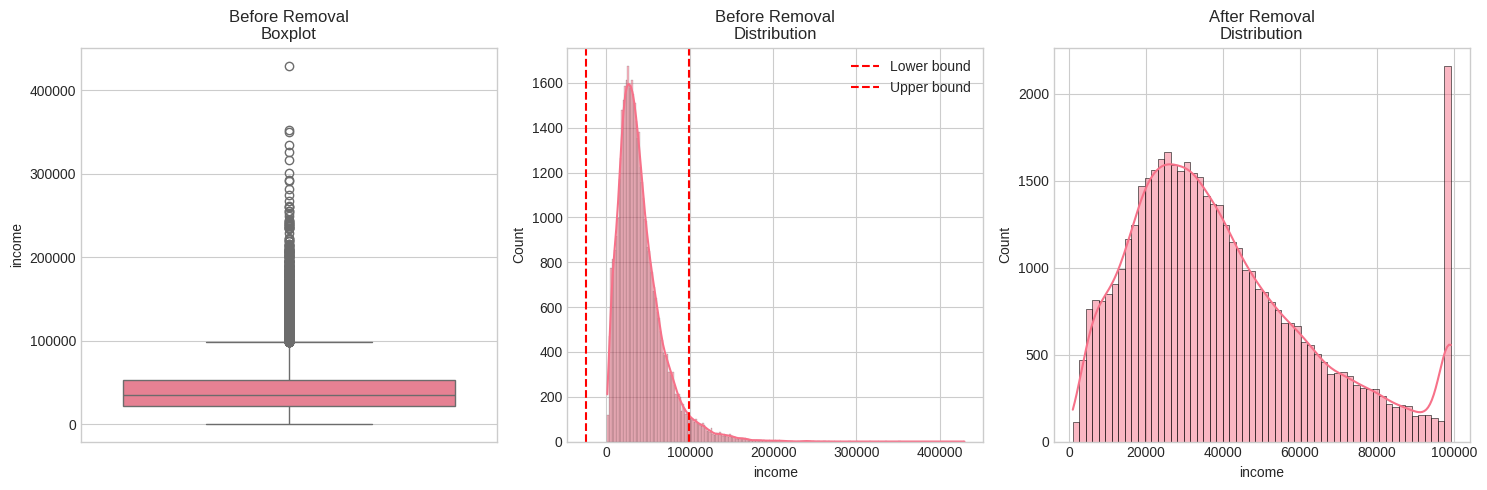


After outlier removal:
Count: 47555
Mean: 39888.03
Median: 34830.72
Std: 24032.78
Min: 977.79
Max: 99188.24

=== Analysis for loan_amount ===

Before outlier removal:
Count: 50000
Mean: 113090.86
Median: 84977.24
Std: 101910.23
Min: 821.49
Max: 1761023.21

Number of outliers detected: 2418
Outliers percentage: 4.84%


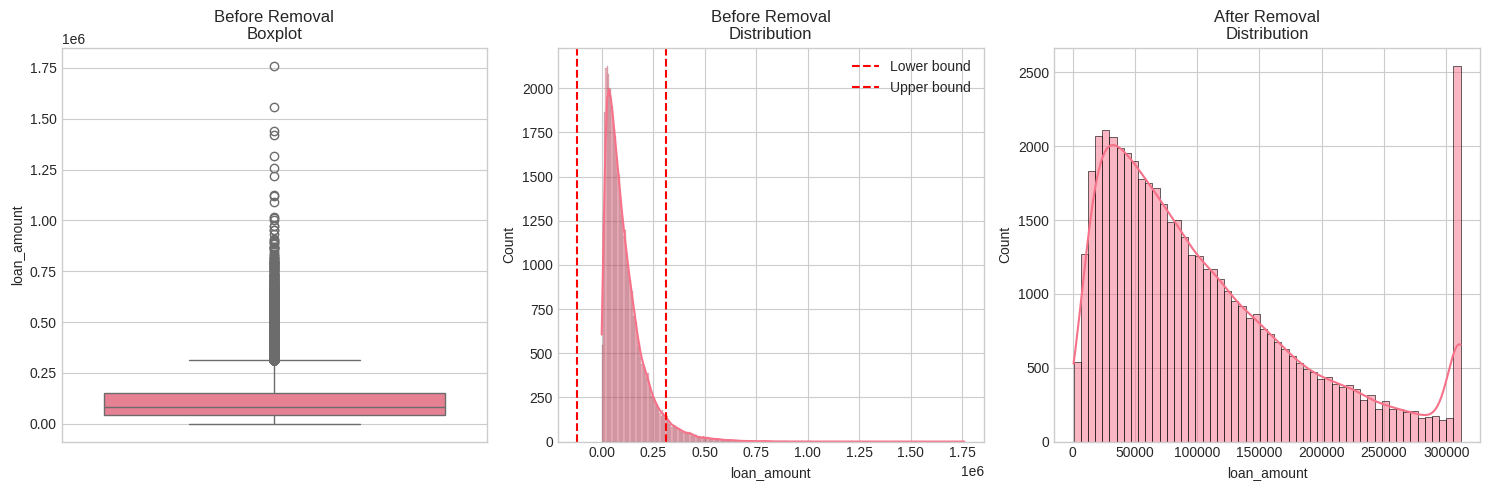


After outlier removal:
Count: 50000
Mean: 107604.50
Median: 84977.24
Std: 82370.91
Min: 821.49
Max: 311619.32

=== Analysis for monthly_payment ===

Before outlier removal:
Count: 50000
Mean: 5070.96
Median: 3210.84
Std: 5931.37
Min: 23.52
Max: 130203.29

Number of outliers detected: 3524
Outliers percentage: 7.05%


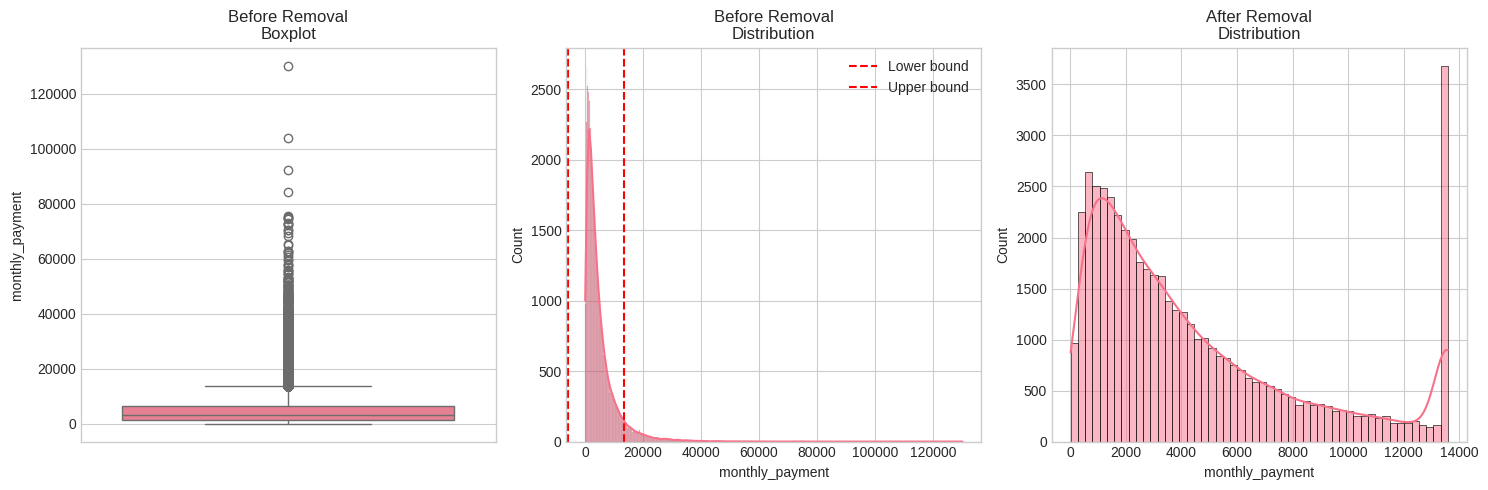


After outlier removal:
Count: 50000
Mean: 4511.67
Median: 3210.84
Std: 3889.43
Min: 23.52
Max: 13581.06


In [ ]:

# Example usage:
numerical_features = ['income', 'loan_amount', 'monthly_payment']
df_cleaned = df.copy()

for feature in numerical_features:
    df_cleaned = analyze_and_remove_outliers_iqr(df_cleaned, feature)



```
# This is formatted as code
```

## Lecture 5: Feature Transformations
=========================================


Key Learning Objectives:
1. Learn when and why to transform features
2. Understand different scaling techniques
3. Apply basic mathematical transformations
4. Validate transformation results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

In [ ]:
# Load the dataset
df = pd.read_csv('loan_applications.csv')

### PART 1: Scaling Transformations
--------------------------
Apply different scaling techniques to numerical features.

In [ ]:
# Select numerical features for scaling
numerical_features = ['income', 'loan_amount', 'monthly_payment',
                     'credit_score', 'employment_length']
df_transformed = df.copy()

### 1. StandardScaler (z-score normalization)

![](https://i0.wp.com/cdn-images-1.medium.com/max/370/1*Nlgc_wq2b-VfdawWX9MLWA.png?ssl=1)

In [ ]:
scaler = StandardScaler()
df_transformed[['income_scaled', 'loan_amount_scaled']] = scaler.fit_transform(
    df[['income', 'loan_amount']])

### 2. MinMaxScaler (to 0-1 range)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfalbkrBP7E2nthrr667MhjxO1SOsVDLOTXw&s)


In [ ]:
minmax = MinMaxScaler()
df_transformed[['credit_score_minmax', 'monthly_payment_minmax']] = minmax.fit_transform(
    df[['credit_score', 'monthly_payment']])

### 3. RobustScaler (using quartiles)

![](https://media.geeksforgeeks.org/wp-content/uploads/20230428205714/for4.png)

In [ ]:
robust = RobustScaler()
df_transformed[['employment_length_robust']] = robust.fit_transform(
    df[['employment_length']])

### PART 2: Mathematical Transformations
-------------------------------
Apply basic mathematical transformations to handle skewness
and non-linear relationships.

### 1. Logarithmic transformation

![](https://theailearner.com/wp-content/uploads/2019/01/log-1.png)

In [ ]:
for feature in ['income', 'loan_amount', 'monthly_payment']:
    df_transformed[f'{feature}_log'] = np.log1p(df[feature])

### 2. Square root transformation

In [ ]:
for feature in ['credit_score', 'employment_length']:
    df_transformed[f'{feature}_sqrt'] = np.sqrt(df[feature])

### 3. Power transformation


In [ ]:
for feature in ['income', 'loan_amount']:
    df_transformed[f'{feature}_squared'] = np.square(df[feature])

### PART 3: Basic Ratio Features
-----------------------
Create simple ratio features from numerical variables.

### 1. Basic financial ratios


In [ ]:
df_transformed['loan_to_income'] = df['loan_amount'] / df['income']
df_transformed['payment_to_income'] = df['monthly_payment'] / df['income']
df_transformed['payment_to_loan'] = df['monthly_payment'] / df['loan_amount']

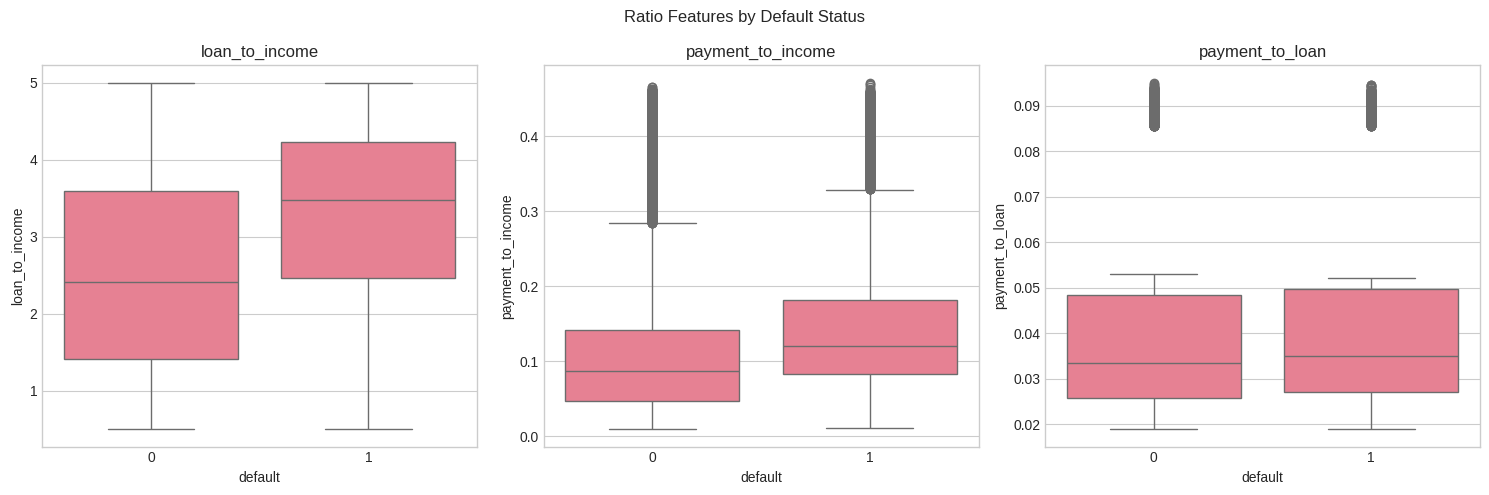

In [ ]:
# Visualize ratio distributions by default status
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Ratio Features by Default Status')

ratios = ['loan_to_income', 'payment_to_income', 'payment_to_loan']
for i, ratio in enumerate(ratios):
    sns.boxplot(x='default', y=ratio, data=df_transformed, ax=axes[i])
    axes[i].set_title(ratio)

plt.tight_layout()
plt.show()

# Lecture 6: Feature Transformation
==================================


Key Learning Objectives:
1. Learn advanced transformation techniques
2. Understand when to use each transformation
3. Handle complex financial relationships
4. Validate transformation effectiveness

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import (
    PowerTransformer,
    QuantileTransformer,
    FunctionTransformer
)

In [ ]:

# Load the dataset
df = pd.read_csv('loan_applications.csv')


## PART 1: Advanced Distribution Transformations
---------------------------------------
Apply transformations to handle complex distributions in
financial data.

In [ ]:

# Select features for transformation
financial_features = ['income', 'loan_amount', 'monthly_payment', 'credit_score']
df_transformed = df.copy()

In [ ]:
# 1. Yeo-Johnson transformation (handles negative values)
pt_yj = PowerTransformer(method='yeo-johnson')
transformed_yj = pt_yj.fit_transform(df[financial_features])

for i, feature in enumerate(financial_features):
    df_transformed[f'{feature}_yeojohnson'] = transformed_yj[:, i]

In [ ]:
# 2. Quantile transformation (uniform distribution)
qt_uniform = QuantileTransformer(output_distribution='uniform')
transformed_uniform = qt_uniform.fit_transform(df[financial_features])

for i, feature in enumerate(financial_features):
    df_transformed[f'{feature}_uniform'] = transformed_uniform[:, i]


In [ ]:
# 3. Quantile transformation (normal distribution)
qt_normal = QuantileTransformer(output_distribution='normal')
transformed_normal = qt_normal.fit_transform(df[financial_features])

for i, feature in enumerate(financial_features):
    df_transformed[f'{feature}_normal'] = transformed_normal[:, i]

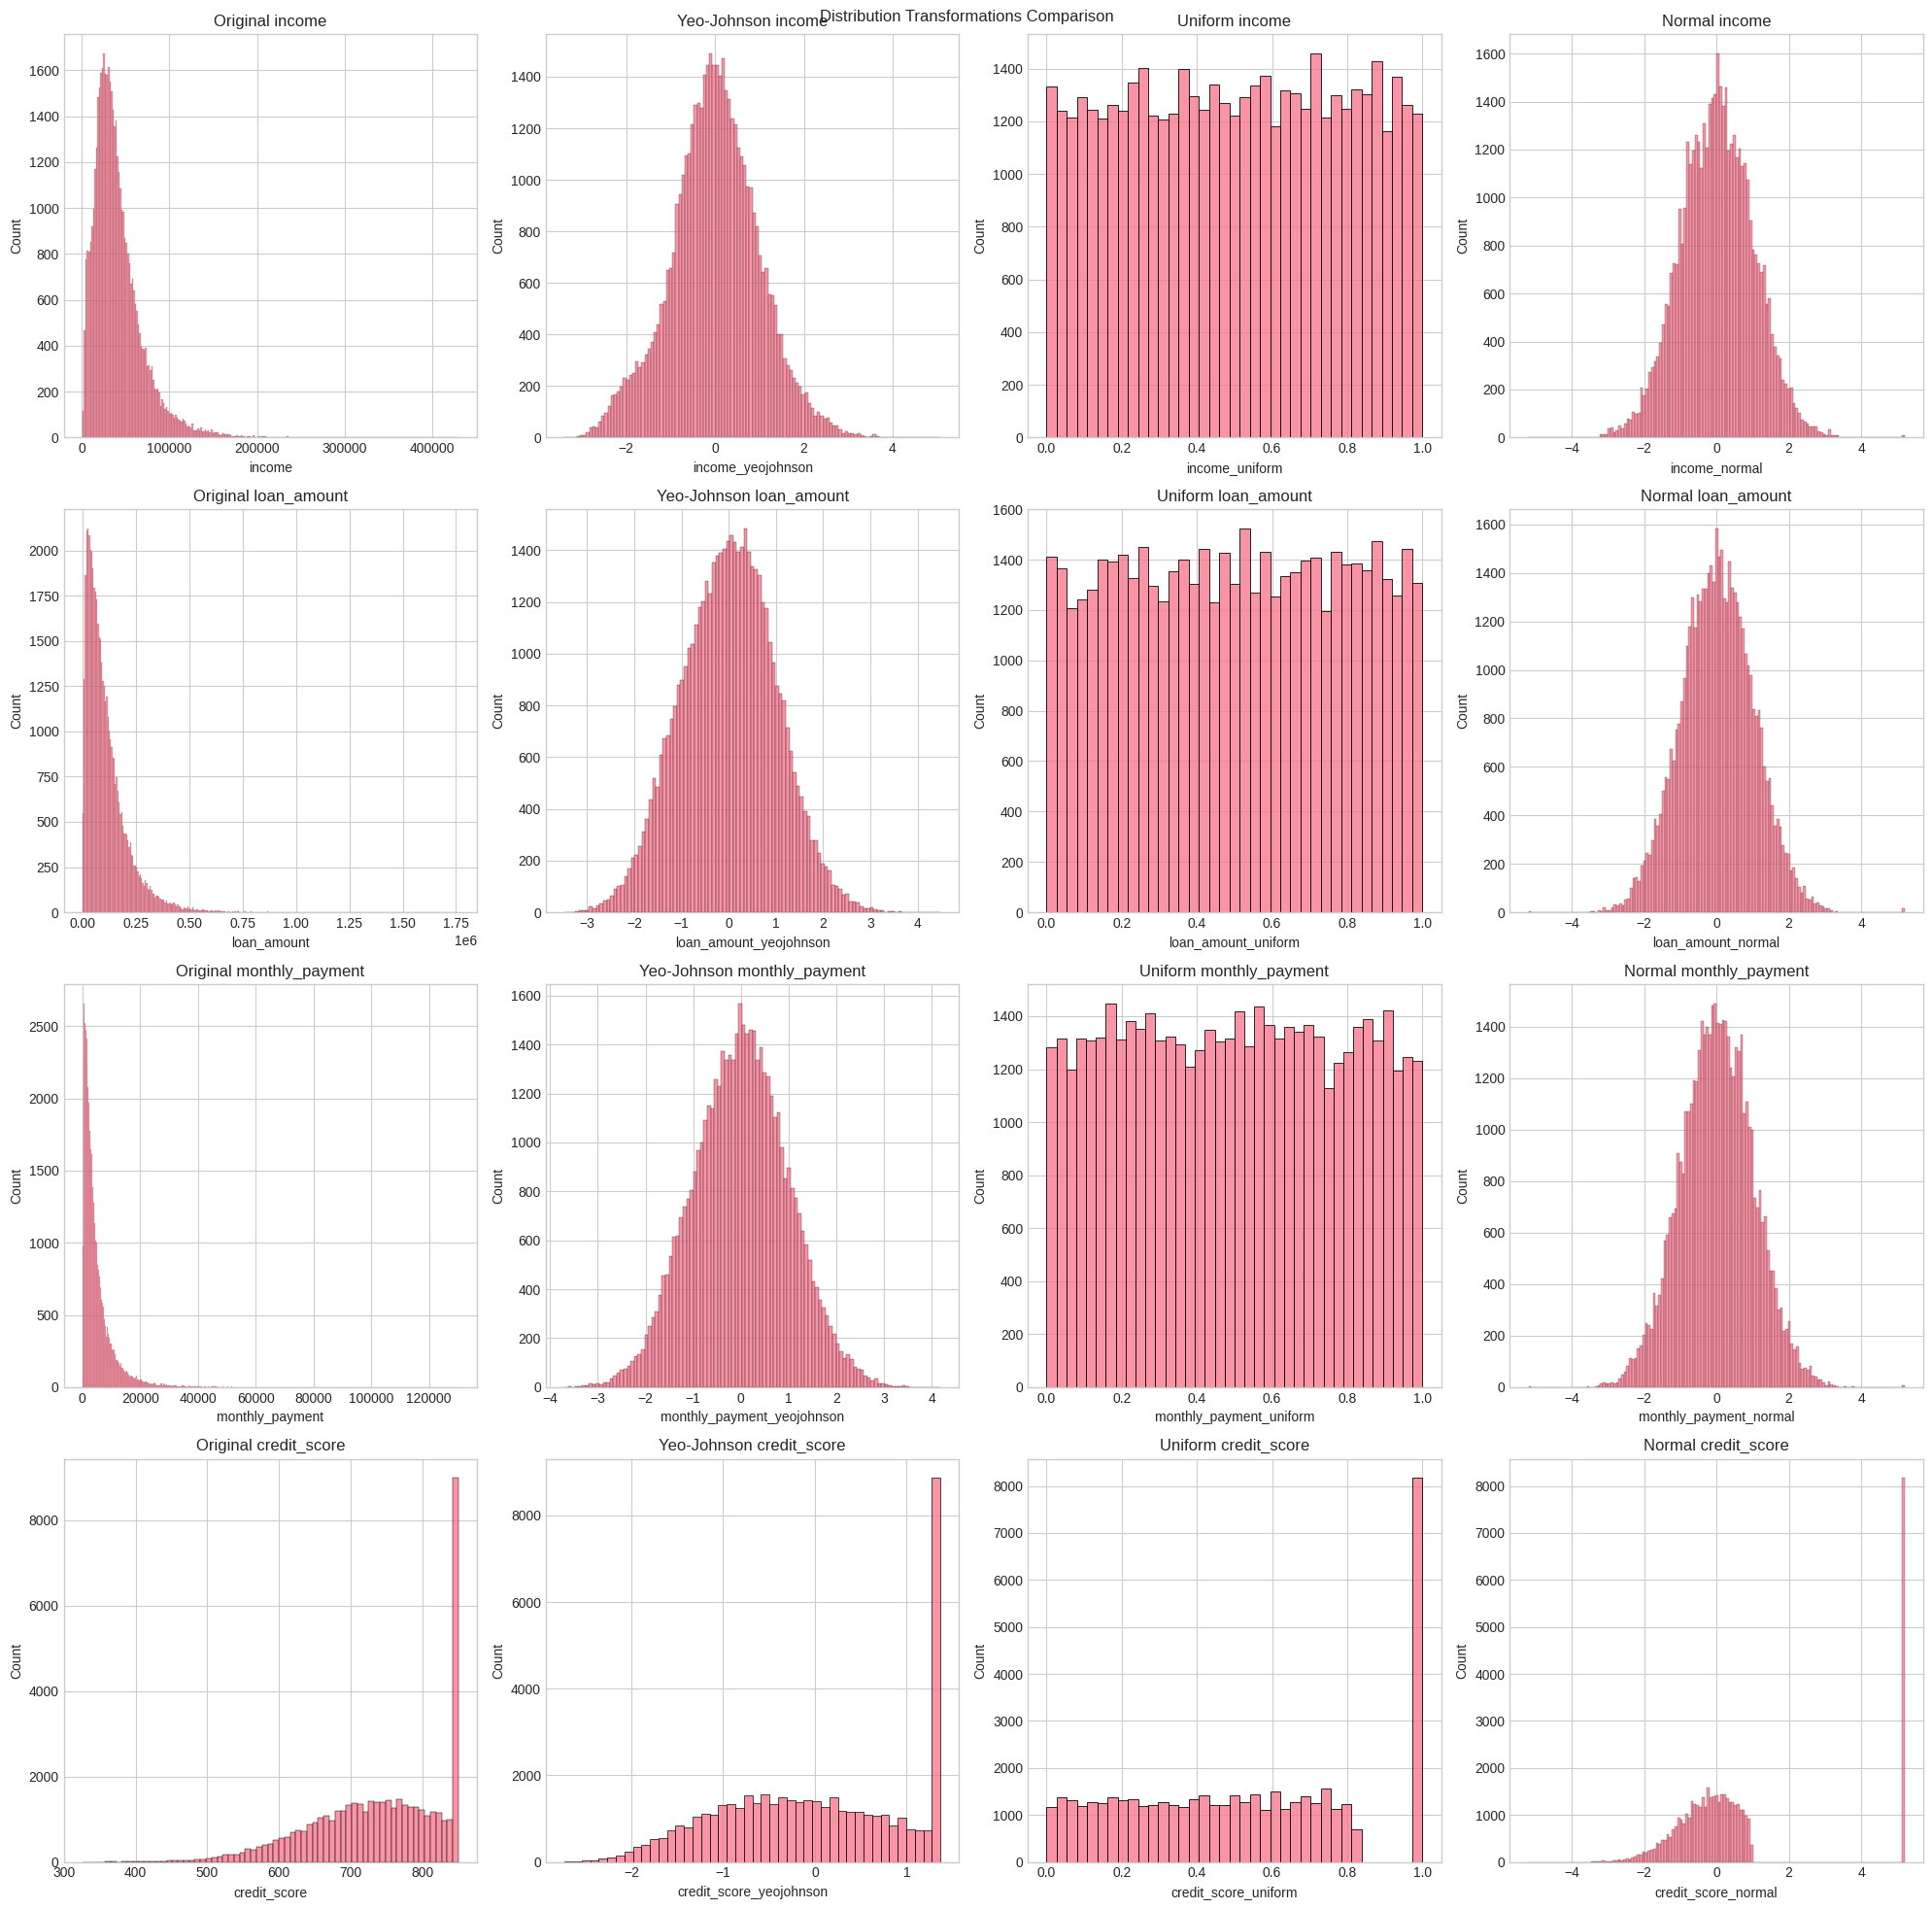

In [ ]:
# Visualize transformations
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Distribution Transformations Comparison')

for i, feature in enumerate(financial_features):
    # Original distribution
    sns.histplot(df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Original {feature}')

    # Yeo-Johnson
    sns.histplot(df_transformed[f'{feature}_yeojohnson'], ax=axes[i, 1])
    axes[i, 1].set_title(f'Yeo-Johnson {feature}')

    # Uniform
    sns.histplot(df_transformed[f'{feature}_uniform'], ax=axes[i, 2])
    axes[i, 2].set_title(f'Uniform {feature}')

    # Normal
    sns.histplot(df_transformed[f'{feature}_normal'], ax=axes[i, 3])
    axes[i, 3].set_title(f'Normal {feature}')

plt.tight_layout()
plt.show()

## PART 2: Domain-Specific (Financial Domain) Transformations
----------------------------------
Apply transformations specific to financial metrics.

In [ ]:
# 1. Risk-adjusted features
def risk_adjust(x, risk_factor):
    return x * (1 - risk_factor)

risk_features = ['income', 'loan_amount']
risk_factor = 1 - (df['credit_score'] / df['credit_score'].max())

for feature in risk_features:
    df_transformed[f'{feature}_risk_adj'] = risk_adjust(df[feature], risk_factor)

In [ ]:
# 2. Smoothed temporal features
def exponential_smooth(x, alpha=0.3):
    return pd.Series(x).ewm(alpha=alpha).mean()

temporal_features = ['monthly_payment']
for feature in temporal_features:
    df_transformed[f'{feature}_smoothed'] = exponential_smooth(df[feature])

In [ ]:
# 3. Bounded transformations
def sigmoid_transform(x):
    return 1 / (1 + np.exp(-x))

def tanh_transform(x):
    return np.tanh(x)

# Apply bounded transformations to normalized features
for feature in financial_features:
    normalized = (df[feature] - df[feature].mean()) / df[feature].std()
    df_transformed[f'{feature}_sigmoid'] = sigmoid_transform(normalized)
    df_transformed[f'{feature}_tanh'] = tanh_transform(normalized)

# Lecture 7: Categorical Encoding
================================

Key Learning Objectives:
1. Understand different encoding techniques
2. Learn when to use each encoding method
3. Handle high-cardinality categories
4. Implement target-based encoding

![](https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    TargetEncoder
)

In [ ]:
df = pd.read_csv('loan_applications.csv')

In [ ]:
# Identify categorical columns
categorical_features = ['education', 'occupation', 'city', 'gender']
df_encoded = df.copy()

In [ ]:

# 1. Label Encoding (for ordinal categories)
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
le = LabelEncoder()
df_encoded['education_label'] = pd.Categorical(
    df['education'],
    categories=education_order,
    ordered=True
).codes


In [ ]:
df_encoded[['education','education_label']]

,education,education_label
0,Master,2
1,Bachelor,1
2,Bachelor,1
3,High School,0
4,Master,2
...,...,...
49995,High School,0
49996,High School,0
49997,High School,0
49998,High School,0


In [ ]:
# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)  # Set sparse=False to get dense array instead of sparse matrix

# Define nominal features
nominal_features = ['occupation', 'city']

# Fit and transform the data
encoded_nominal = ohe.fit_transform(df[nominal_features])

# Get feature names
encoded_feature_names = ohe.get_feature_names_out(nominal_features)

# Create a new dataframe with encoded features
df_encoded = pd.DataFrame(
    encoded_nominal,
    columns=encoded_feature_names,
    index=df.index
)

# If you want to add these columns to your original dataframe:
df_new = pd.concat([df.drop(columns=nominal_features), df_encoded], axis=1)

In [ ]:
df_new

,application_id,application_date,age,gender,education,employment_length,income,loan_amount,loan_term,interest_rate,...,city_CITY_90,city_CITY_91,city_CITY_92,city_CITY_93,city_CITY_94,city_CITY_95,city_CITY_96,city_CITY_97,city_CITY_98,city_CITY_99
0,1,2020-01-05,40,M,Master,13.573526,40298.38,95254.57,48,10.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2020-05-21,33,M,Bachelor,3.061310,38167.11,140514.31,60,17.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2020-09-24,42,F,Bachelor,12.040059,8666.27,13340.61,60,11.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2020-05-10,53,F,High School,8.490862,33093.00,73008.42,60,12.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2020-05-15,32,M,Master,0.782913,41115.42,51399.26,12,7.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2020-04-29,35,F,High School,17.040450,70512.55,125702.41,48,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,49997,2020-01-01,34,M,High School,8.223475,53982.42,116670.99,12,9.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,49998,2020-12-17,41,F,High School,16.159530,58448.91,96536.32,36,11.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,49999,2020-01-09,38,F,High School,13.508595,NaN,52380.74,12,12.24,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 3. Binary Encoding (for gender)
df_encoded['gender_binary'] = (df['gender'] == 'Male').astype(int)


## PART 2: Handling High Cardinality
---------------------------
Deal with categorical variables that have many unique values.

In [ ]:
# 1. Frequency-based encoding
for feature in ['occupation', 'city']:
    value_counts = df[feature].value_counts()
    print(f'{feature}_freq')
    df_encoded[f'{feature}_freq'] = df[feature].map(value_counts)

occupation_freq
city_freq


In [ ]:
df_encoded['city_freq']

,city_freq
0,1244
1,1237
2,1766
3,519
4,223
...,...
49995,1592
49996,337
49997,1522
49998,1990


In [ ]:
# 2. Top-K encoding with "Other" category
def top_k_encoding(series, k=10):
    value_counts = series.value_counts()
    top_k = value_counts.nlargest(k).index
    return series.map(lambda x: x if x in top_k else 'Other')

df_encoded['city_top_k'] = top_k_encoding(df['city'])
df_encoded['occupation_top_k'] = top_k_encoding(df['occupation'])

In [ ]:
df_encoded['city_top_k']

,city_top_k
0,CITY_22
1,CITY_41
2,CITY_68
3,Other
4,Other
...,...
49995,CITY_12
49996,Other
49997,CITY_44
49998,CITY_90


# Lecture 8: Feature Interactions
================================

Key Learning Objectives:
1. Understand different types of feature interactions
2. Create meaningful financial interaction features
3. Combine categorical and numerical features
4. Evaluate interaction effectiveness

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import chi2_contingency


# Load the encoded dataset
df = pd.read_csv('loan_applications.csv')

In [ ]:
# Select numerical features for interactions
numerical_features = ['income', 'loan_amount', 'monthly_payment',
                     'credit_score', 'employment_length']
df_interactions = df.copy()

In [ ]:
# 1. Basic Financial Ratios
df_interactions['debt_service_ratio'] = df['monthly_payment'] / df['income']
df_interactions['loan_to_income'] = df['loan_amount'] / df['income']
df_interactions['payment_to_loan'] = df['monthly_payment'] / df['loan_amount']

In [ ]:
# 2. Polynomial Interactions
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = ['loan_amount']
poly_transformed = poly.fit_transform(df[poly_features])
poly_names = poly.get_feature_names_out(poly_features)

In [ ]:
poly_names

array(['loan_amount', 'loan_amount^2'], dtype=object)

In [ ]:
for i, name in enumerate(poly_names):
    if i >= len(poly_features):  # Skip original features
        df_interactions[f'poly_{name}'] = poly_transformed[:, i]

# 3. Risk-Weighted Features
df_interactions['risk_weighted_income'] = df['income'] * (df['credit_score'] / df['credit_score'].max())
df_interactions['risk_weighted_loan'] = df['loan_amount'] * (1 - df['credit_score'] / df['credit_score'].max())


## PART 2: Categorical-Numerical Interactions
------------------------------------
Create interactions between categorical and numerical features.

In [ ]:
# 1. Education-Income Interaction
education_income_mean = df.groupby('education')['income'].transform('mean')
df_interactions['relative_income'] = df['income'] / education_income_mean

In [ ]:
# 2. Occupation-Loan Interaction
occupation_loan_mean = df.groupby('occupation')['loan_amount'].transform('mean')
df_interactions['relative_loan'] = df['loan_amount'] / occupation_loan_mean